Additional notebook for investigating affect of sweeps of parameters on T1 rate, etc

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("../../../simulator/")
sys.path.append("../../../fitting/")



from tissue import *
import tissplot as tplt
import matplotlib.path as mplPath
import datasets as ds 
import tiss_optimize as topt
import sim_model

In [3]:
s0 = topt.simulator(sim_model.S_mech_switch, {'p0': [3.25, 3.5, 3.75, 4.0, 4.25], 
                                              'tau': [100, 200, 400, 800, 1600, 3200, 6400, 12800],
                                              'rho_c': [0.5, 0.75, 1.0, 1.25]},
                    params = {'Ahigh': np.inf, 'hilln': 2.0, 'L': 25}, simtype = 'h',
                    order_params = [('ncells', 'mean'), ('ncells', 'std'),
                                    ('T1s', 'sum'), ('T1s', 'av_rate_per_cell'),
                                    ('MSD', 'all'), ('MSD', 'slope'),
                                    ('shape', 'mean')])

In [17]:
#Run Sweep_T1s.py and analyse here

r0 = ds.load_object('hrunspace_S_mech_switch_t_5000_n_625_Ahigh_L_hilln_p0_rho_c_tau.pkl')
r0.columns

Index(['index', 'p0', 'tau', 'rho_c', 'Ahigh', 'hilln', 'L', 'maxseed',
       'ncells_mean', 'ncells_std', 'T1s_sum', 'T1s_av_rate_per_cell',
       'MSD_all', 'MSD_slope', 'shape_mean'],
      dtype='object')

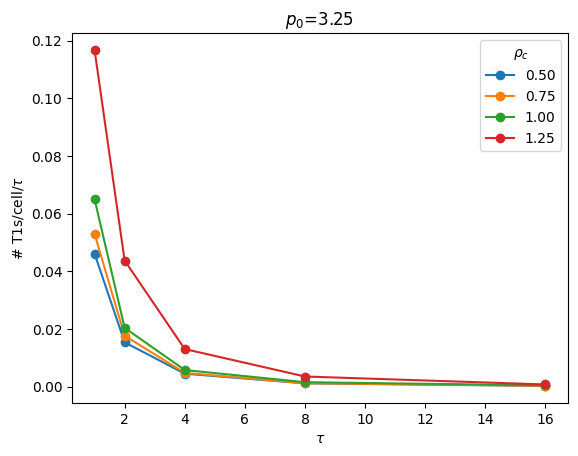

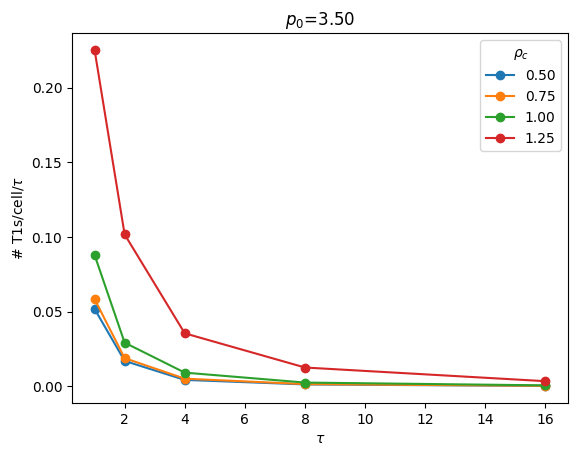

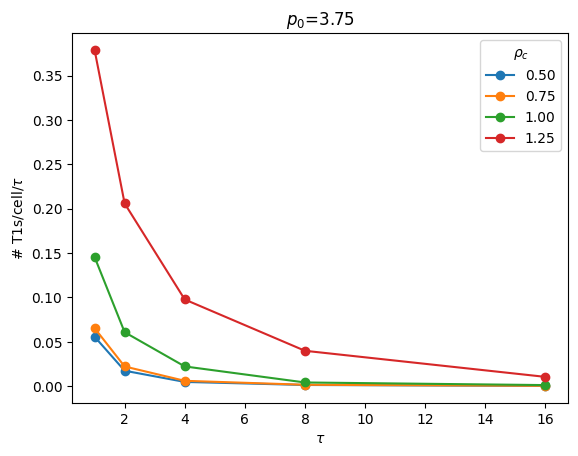

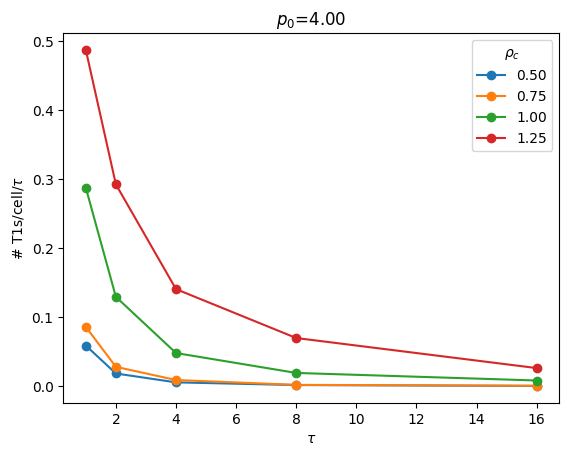

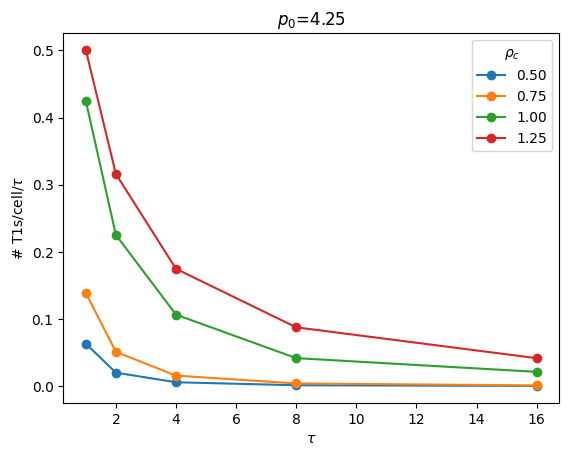

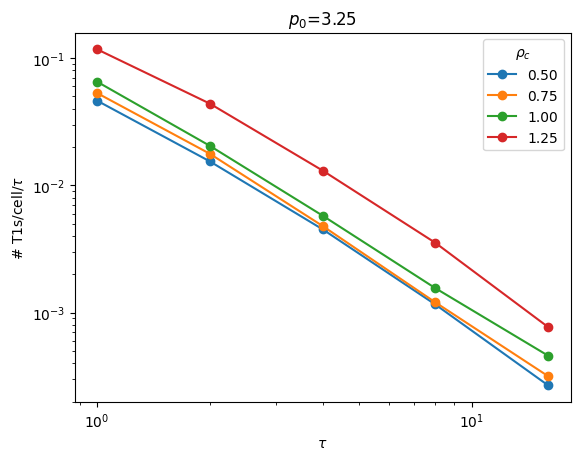

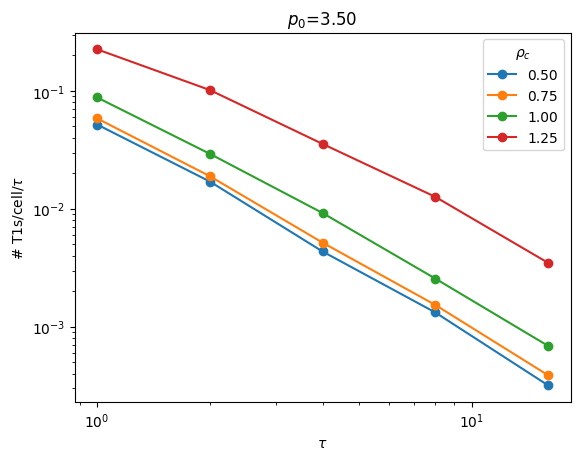

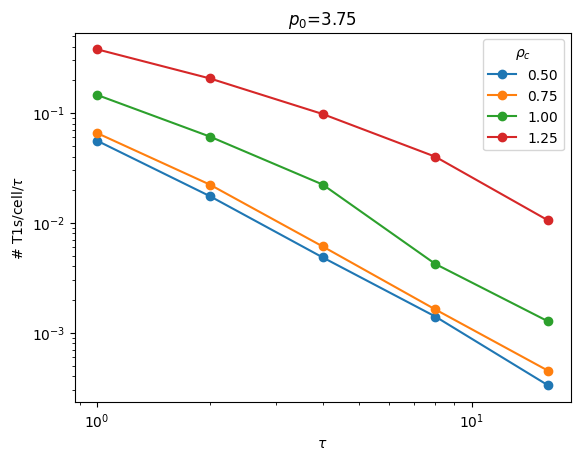

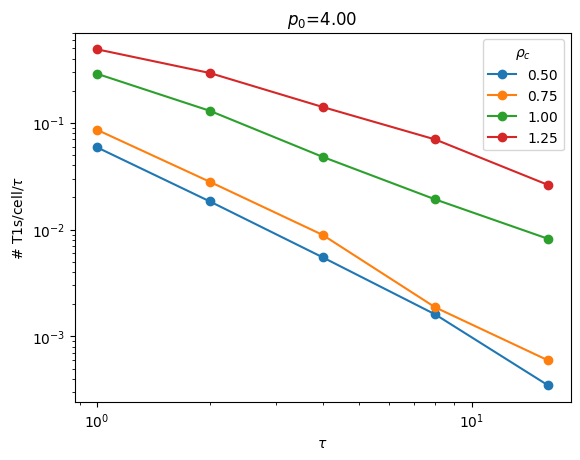

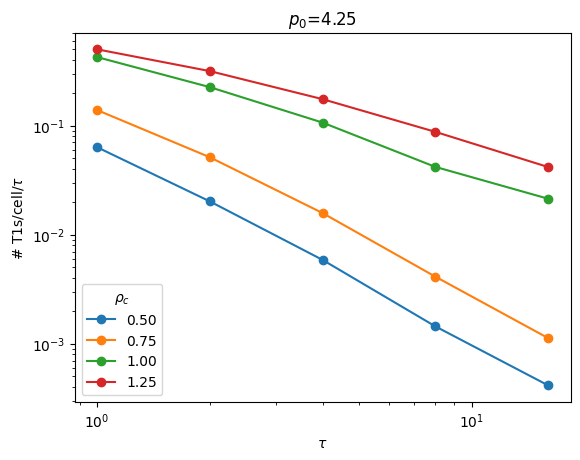

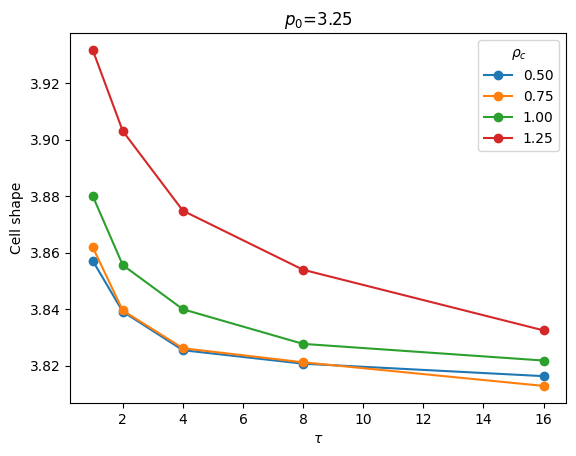

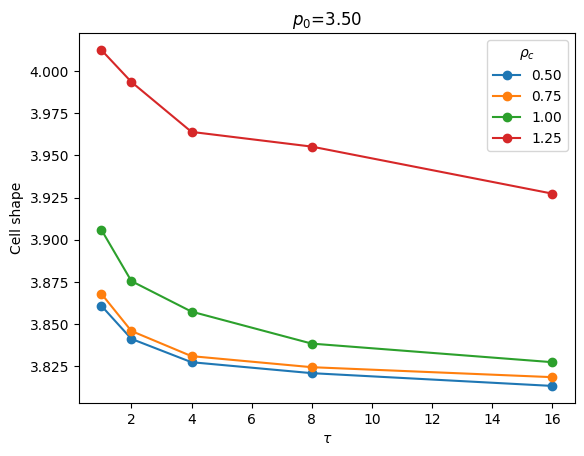

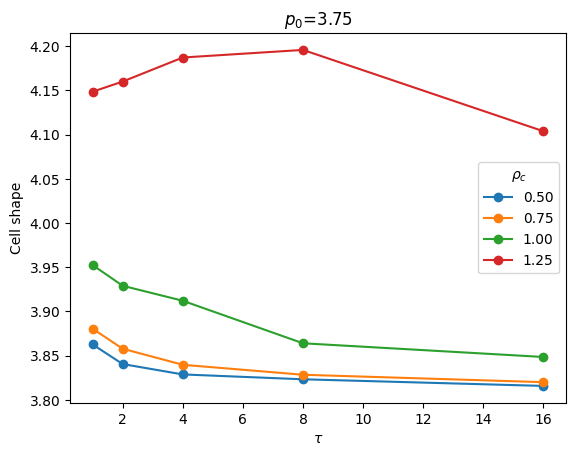

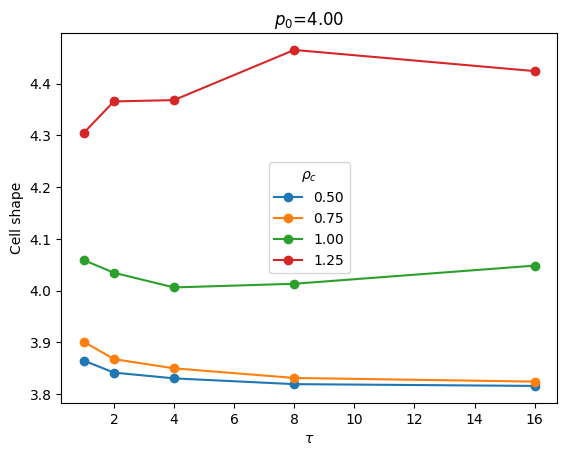

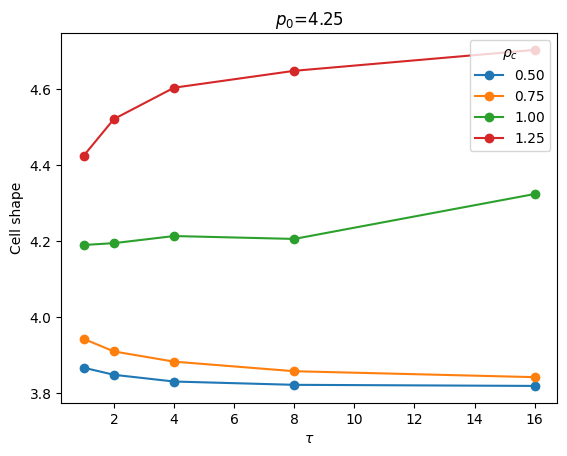

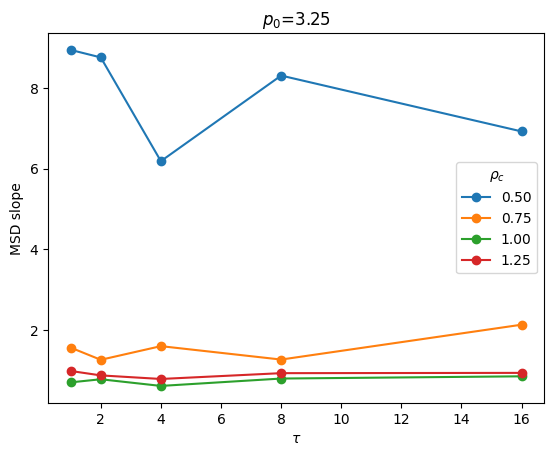

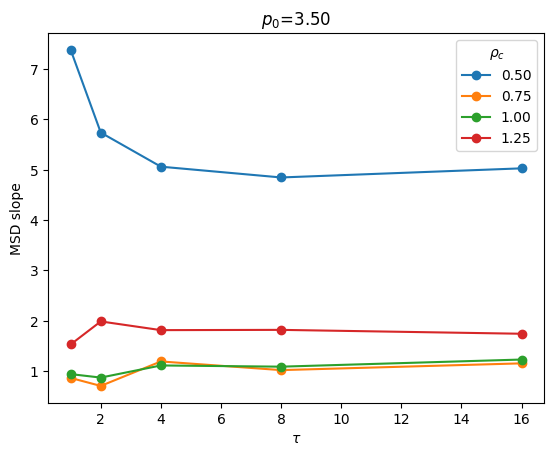

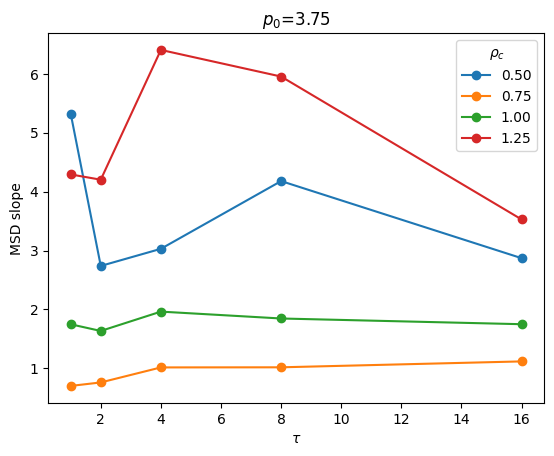

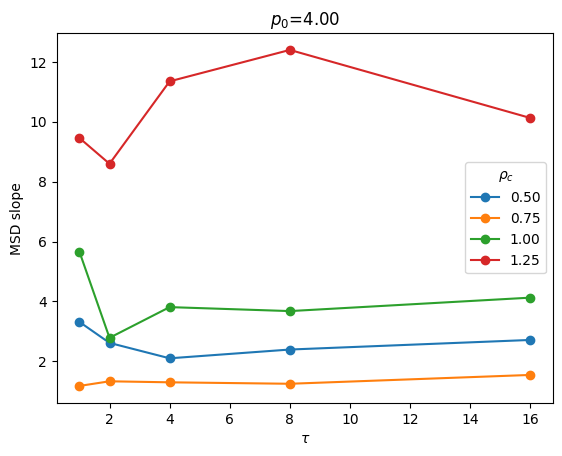

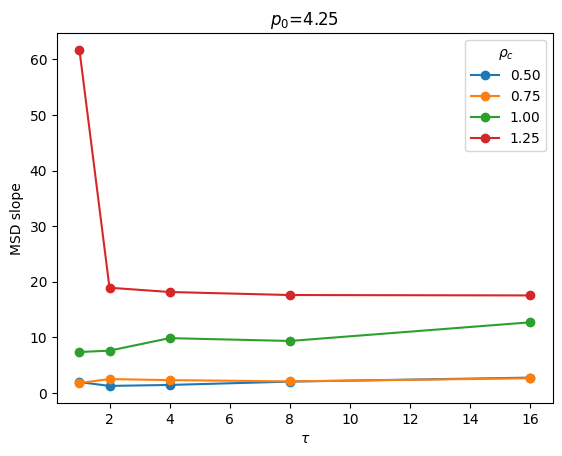

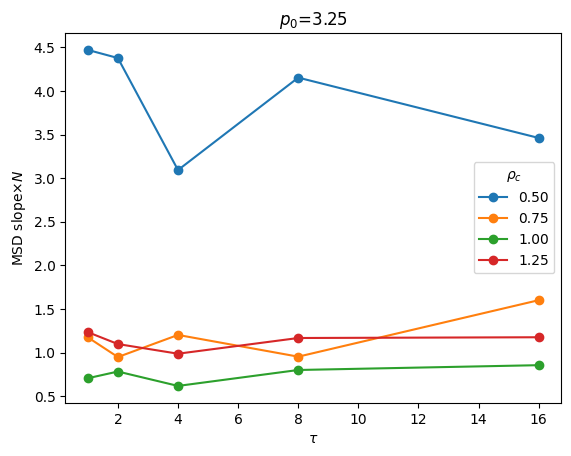

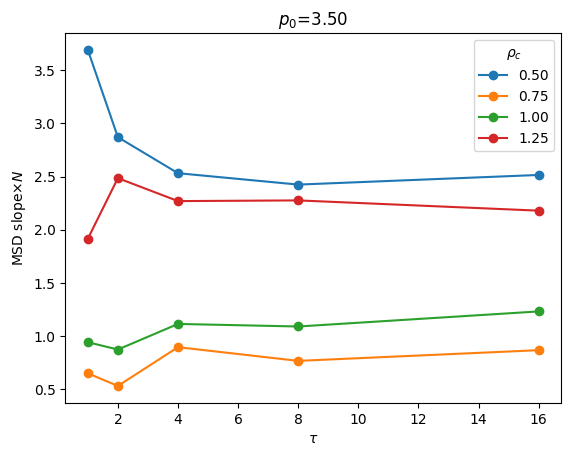

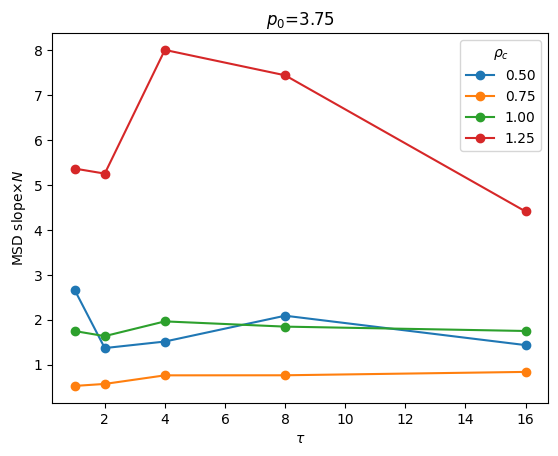

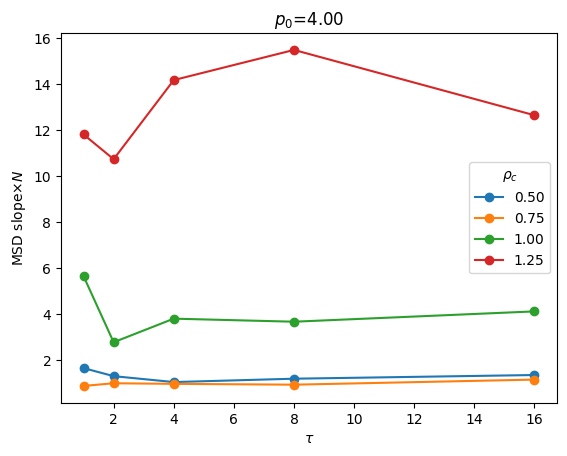

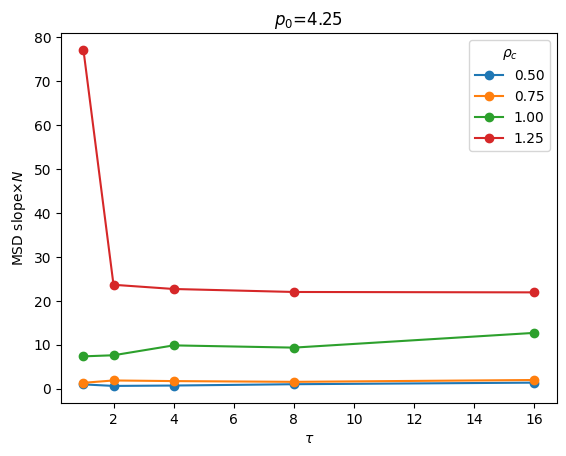

In [49]:
p0vals = np.unique(r0['p0'])
rho_cvals = np.unique(r0['rho_c'])


for p0 in p0vals:
    plt.figure()
    for rho_c in rho_cvals:
        subr0 = r0[(r0['p0'] == p0) & (r0['rho_c'] == rho_c)]
        plt.plot(subr0['tau']/100, subr0['T1s_sum']/subr0['ncells_mean']/subr0['tau'], 'o-', label='%.2f' % rho_c)
        plt.xlabel(r'$\tau$')
        plt.ylabel(r'# T1s/cell/$\tau$')
        plt.title(r'$p_0$=%.2f' % p0)
        plt.legend(title = r'$\rho_c$')
    plt.show()
    
    
for p0 in p0vals:
    plt.figure()
    for rho_c in rho_cvals:
        subr0 = r0[(r0['p0'] == p0) & (r0['rho_c'] == rho_c)]
        plt.loglog(subr0['tau']/100, subr0['T1s_sum']/subr0['ncells_mean']/subr0['tau'], 'o-', label='%.2f' % rho_c)
        plt.xlabel(r'$\tau$')
        plt.ylabel(r'# T1s/cell/$\tau$')
        plt.title(r'$p_0$=%.2f' % p0)
        plt.legend(title = r'$\rho_c$')
    plt.show()


for p0 in p0vals:
    plt.figure()
    for rho_c in rho_cvals:
        subr0 = r0[(r0['p0'] == p0) & (r0['rho_c'] == rho_c)]
        plt.plot(subr0['tau']/100, subr0['shape_mean'], 'o-', label='%.2f' % rho_c)
        plt.xlabel(r'$\tau$')
        plt.ylabel(r'Cell shape')
        plt.title(r'$p_0$=%.2f' % p0)
        plt.legend(title = r'$\rho_c$')
    plt.show()
    
    
for p0 in p0vals:
    plt.figure()
    for rho_c in rho_cvals:
        subr0 = r0[(r0['p0'] == p0) & (r0['rho_c'] == rho_c)]
        plt.plot(subr0['tau']/100, subr0['MSD_slope'], 'o-', label='%.2f' % rho_c)
        plt.xlabel(r'$\tau$')
        plt.ylabel(r'MSD slope')
        plt.title(r'$p_0$=%.2f' % p0)
        plt.legend(title = r'$\rho_c$')
    plt.show()


for p0 in p0vals:
    plt.figure()
    for rho_c in rho_cvals:
        subr0 = r0[(r0['p0'] == p0) & (r0['rho_c'] == rho_c)]
        plt.plot(subr0['tau']/100, subr0['MSD_slope']*rho_c, 'o-', label='%.2f' % rho_c)
        plt.xlabel(r'$\tau$')
        plt.ylabel(r'MSD slope$\times N$')
        plt.title(r'$p_0$=%.2f' % p0)
        plt.legend(title = r'$\rho_c$')
    plt.show()